In [106]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Variables tabla colors:
#### id:
- Tipo de dato: Categórico (puede ser considerado también como ordinal, dependiendo del contexto).
- Informatividad: Sí, es informativo para identificar cada registro, pero no es informativo para un problema de clasificación en sí mismo.
#### name:

- Tipo de dato: Categórico.
- Informatividad: Sí, es informativo para un problema de clasificación, ya que proporciona nombres descriptivos asociados a cada id.
#### rgb:

- Tipo de dato: Categórico (podría considerarse como código alfanumérico).
- Informatividad: Sí, es informativo para un problema de clasificación relacionado con colores.
#### is_trans:
- Tipo de dato: Categórico (binario).
- Informatividad: Sí, es informativo para un problema de clasificación, ya que indica si el color es transparente o no.
En resumen, todas las variables son categóricas en este conjunto de datos. Para un problema de clasificación, las variables "name", "rgb", y "is_trans" son informativas, ya que proporcionan características descriptivas relevantes que podrían usarse para clasificar o etiquetar registros.

In [107]:
colors = pd.read_csv('./dataset/colors.csv')
colors.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### Variables tabla inventory_parts:

#### inventory_id:
- Tipo de dato: Numérico, categórico.
- Informatividad: Sí, es informativo para identificar el inventario al que pertenece el registro.

#### part_num:
- Tipo de dato: Categórico (alphanumeric).
- Informatividad: Sí, es informativo para identificar la parte específica.

#### color_id:
- Tipo de dato: Numérico, categórico.
- Informatividad: Sí, es informativo para identificar el color asociado a la parte.

#### quantity:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para indicar la cantidad de la parte en el inventario.

#### is_spare:
- Tipo de dato: Categórico (binario).
- Informatividad: Sí, es informativo para un problema de clasificación, ya que indica si la parte es un repuesto o no.

In [108]:
inventory_parts = pd.read_csv('./dataset/inventory_parts.csv')
inventory_parts.head(5)

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


### Analisis variable Quantity:

Resumen estadístico básico:
 count    580251.000000
mean          3.324730
std           8.229816
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64


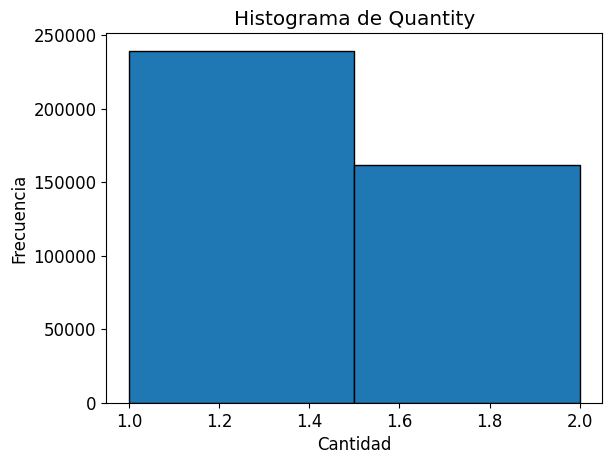

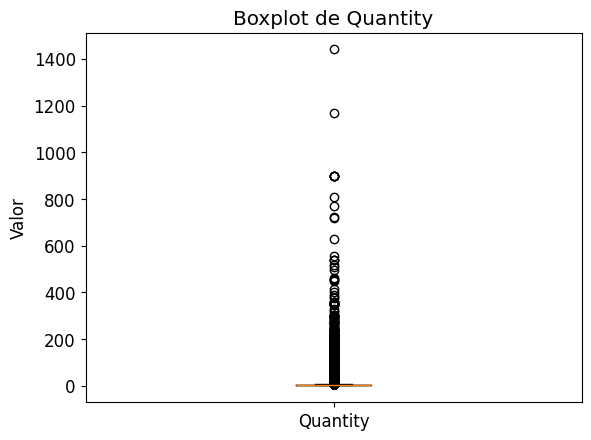

In [109]:
# Resumen estadístico básico
summary_stats = inventory_parts['quantity'].describe()
print("Resumen estadístico básico:\n", summary_stats)

# Histograma
plt.hist(inventory_parts['quantity'], bins=[1, 1.5, 2], edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Quantity')
plt.show()

# Boxplot
plt.boxplot(inventory_parts['quantity'])
plt.xticks([1], ['Quantity'])
plt.ylabel('Valor')
plt.title('Boxplot de Quantity')
plt.show()

In [110]:
inventory_parts_with_color = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left')
inventory_parts_with_color.rename(columns={'name': 'color_name'}, inplace=True)
inventory_parts_with_color = inventory_parts_with_color[['inventory_id', 'part_num', 'color_id', 'color_name', 'rgb', 'is_trans', 'quantity', 'is_spare']]
inventory_parts_with_color.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f
1,1,48395,7,Light Gray,9BA19D,f,1,f
2,1,mcsport6,25,Orange,FE8A18,f,1,f
3,1,paddle,0,Black,05131D,f,1,f
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f


### Variables tabla inventories

#### id:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo como identificador único para cada registro.

#### version:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para indicar la versión asociada al conjunto de datos.

#### set_num:
- Tipo de dato: Categórico (alfanumérico).
- Informatividad: Sí, es informativo para identificar el número de conjunto al que pertenece cada registro.


In [111]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


### Variables tabla Inventory Sets
#### inventory_id:
- Tipo de dato: Numerico, categorico.
- Informatividad: Sí, es informativo para identificar el inventario al que pertenece el registro.

#### set_num:
- Tipo de dato: Categórico (alfanumérico).
- Informatividad: Sí, es informativo para identificar el número de conjunto asociado al inventario.

#### quantity:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para indicar la cantidad de conjuntos en el inventario.

In [112]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


### Analisis Variable numerica: Quantity

Resumen estadístico básico:
 count    2846.000000
mean        1.375966
std         4.563002
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        60.000000
Name: quantity, dtype: float64


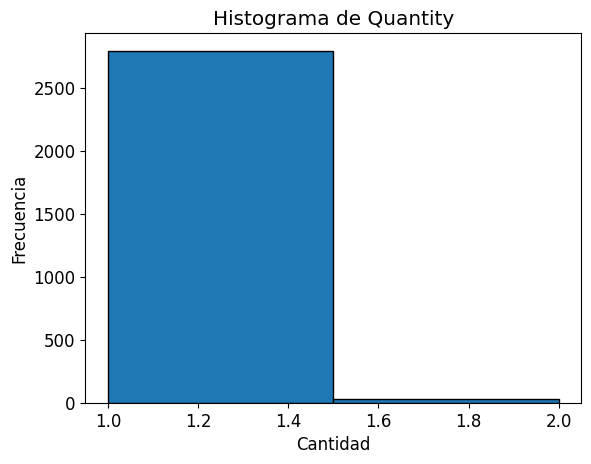

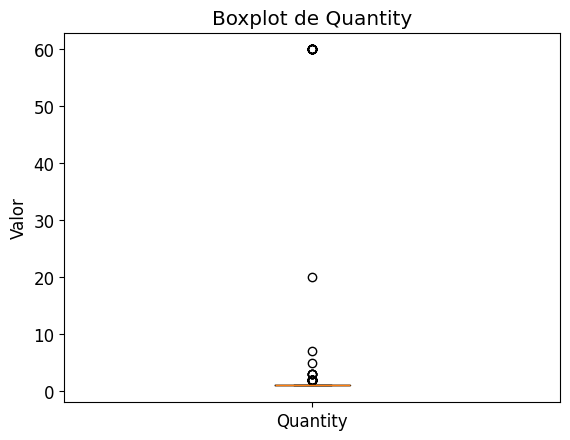

In [113]:
# Resumen estadístico básico
summary_stats = inventory_sets['quantity'].describe()
print("Resumen estadístico básico:\n", summary_stats)

# Histograma
plt.hist(inventory_sets['quantity'], bins=[1, 1.5, 2], edgecolor='black')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Quantity')
plt.show()

# Boxplot
plt.boxplot(inventory_sets['quantity'])
plt.xticks([1], ['Quantity'])
plt.ylabel('Valor')
plt.title('Boxplot de Quantity')
plt.show()

### Variables tabla Sets:

#### set_num:
- Tipo de dato: Categórico (alfanumérico).
- Informatividad: Sí, es informativo para identificar de manera única cada conjunto.

#### name:
- Tipo de dato: Categórico.
- Informatividad: Sí, es informativo para proporcionar el nombre descriptivo de cada conjunto.

#### year:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para indicar el año de lanzamiento de cada conjunto.

#### theme_id:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para identificar el tema al que pertenece cada conjunto.

#### num_parts:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para indicar el número de piezas que componen cada conjunto.

In [114]:
sets = pd.read_csv('./dataset/sets.csv')
sets.head(5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


### Variables tabla parts:
#### part_num:
- Tipo de dato: Categórico (alfanumérico).
- Informatividad: Sí, es informativo para identificar de manera única cada parte.

#### name:
- Tipo de dato: Categórico.
- Informatividad: Sí, es informativo para proporcionar el nombre descriptivo de cada parte.

#### part_cat_id:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo para identificar la categoría a la que pertenece cada parte.

In [115]:
parts = pd.read_csv('./dataset/parts.csv')
parts.head(5)

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [116]:
# parts['name'].value_counts()
parts.shape
# parts['part_cat_id'].isna().value_counts()

(25993, 3)

### Variables tabla Part Categories:
#### id:
- Tipo de dato: Numérico.
- Informatividad: Sí, es informativo como identificador único de cada categoría.

#### name:
- Tipo de dato: Categórico.
- Informatividad: Sí, es informativo al proporcionar el nombre descriptivo de cada categoría de piezas LEGO.


In [117]:
part_categories = pd.read_csv('./dataset/part_categories.csv')
part_categories.head(5)

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [118]:
parts_with_categories = parts.merge(part_categories, left_on='part_cat_id', right_on='id', how='left')
parts_with_categories.rename(columns={'name_y': 'part_category', 'name_x': 'part_name'}, inplace=True)
parts_with_categories = parts_with_categories[['part_num', 'part_name', 'part_cat_id', 'part_category']]
parts_with_categories.head(5)


,part_num,part_name,part_cat_id,part_category
0,0687b1,Set 0687 Activity Booklet 1,17,Non-LEGO
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,Baseplates
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,Baseplates
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,Baseplates
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,Baseplates


In [119]:
parts_with_categories_graph = parts_with_categories['part_category'].value_counts()
parts_with_categories_graph.sort_values(ascending=True)

part_category
Tools                                              8
Technic Bushes                                     9
Technic Pins                                      19
Znap                                              22
Technic Beams Special                             22
HO Scale                                          23
Technic Bricks                                    26
Mechanical                                        28
Pneumatics                                        28
Technic Axles                                     28
Tiles                                             30
Technic Beams                                     32
Rock                                              35
Magnets and Holders                               36
Technic Panels                                    56
Plates Angled                                     57
Plates                                            62
Technic Gears                                     68
Technic Steering, Suspension and

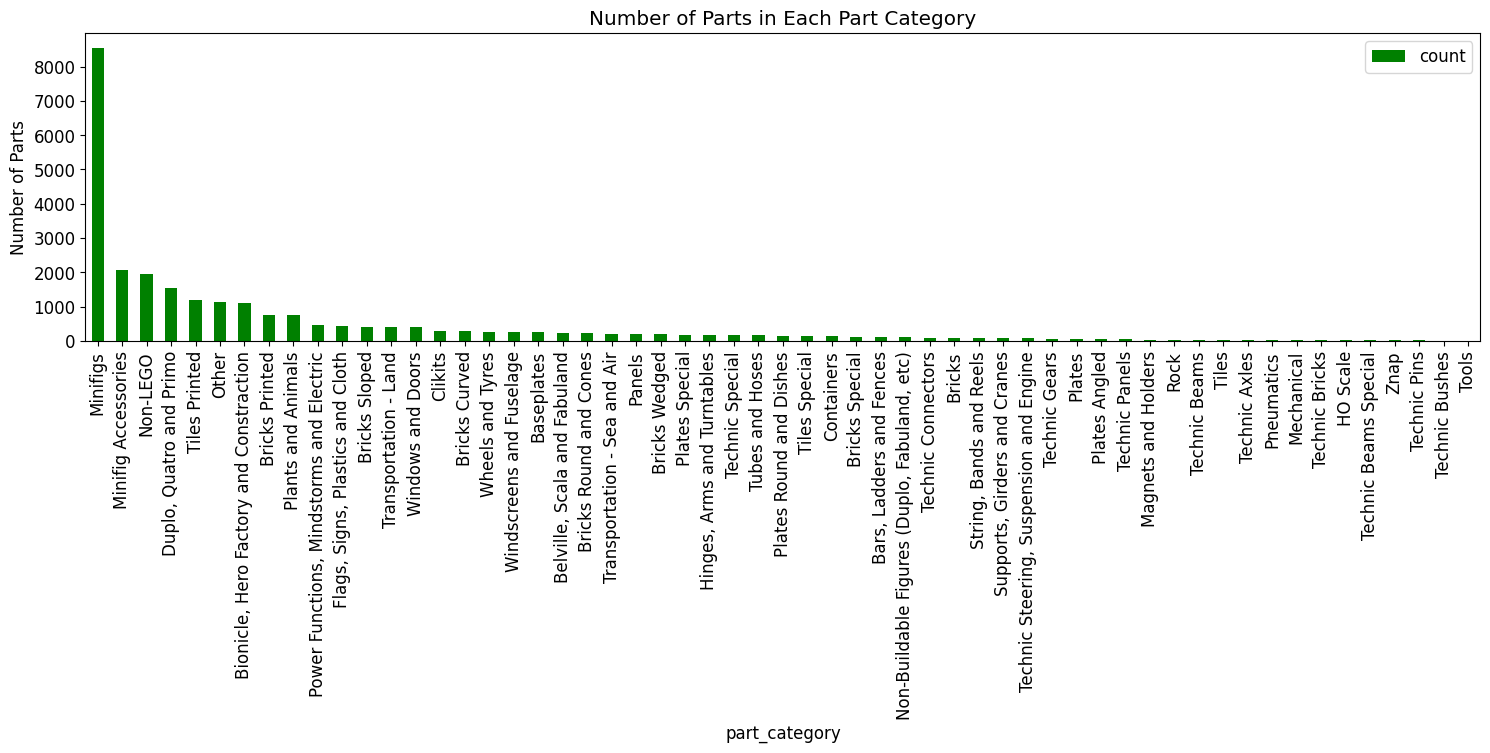

In [120]:
matplotlib.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(figsize=(18,4))
parts_with_categories_graph.plot(kind="bar", color="green", alpha=1)

plt.ylabel('Number of Parts')
plt.title('Number of Parts in Each Part Category')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [121]:
inventory_with_parts = inventory_parts_with_color.merge(parts_with_categories, on='part_num', how='left')
inventory_with_parts.rename(columns={'name': 'part_name'}, inplace=True)
inventory_with_parts.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare,part_name,part_cat_id,part_category
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories
1,1,48395,7,Light Gray,9BA19D,f,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories
2,1,mcsport6,25,Orange,FE8A18,f,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs
3,1,paddle,0,Black,05131D,f,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Minifigs


In [122]:
inventory_with_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventory_id   580251 non-null  int64  
 1   part_num       580251 non-null  object 
 2   color_id       580251 non-null  int64  
 3   color_name     580251 non-null  object 
 4   rgb            580251 non-null  object 
 5   is_trans       580251 non-null  object 
 6   quantity       580251 non-null  int64  
 7   is_spare       580251 non-null  object 
 8   part_name      580069 non-null  object 
 9   part_cat_id    580069 non-null  float64
 10  part_category  580069 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 48.7+ MB


In [123]:
inventory_with_parts.shape
# Ultimas 3 columnas (part_name, part_cat_id, category) poseen al menos 182 nulls

(580251, 11)

In [124]:
inventory_with_parts_grouped=inventory_with_parts.groupby('part_num')['quantity'].sum().reset_index().sort_values(by='quantity')
# inventory_with_parts_graph=inventory_with_parts_graph.head(100)
# inventory_with_parts_graph['part_num'].value_counts()
print(inventory_with_parts_grouped)


         part_num  quantity
0          0687b1         1
13180  60119stk01         1
13181       60125         1
13183  60128stk01         1
13184  60129stk01         1
...           ...       ...
4448         3005     46973
4314         3003     48543
13675        6141     53535
4983         3023     58777
4385         3004     69250

[23131 rows x 2 columns]


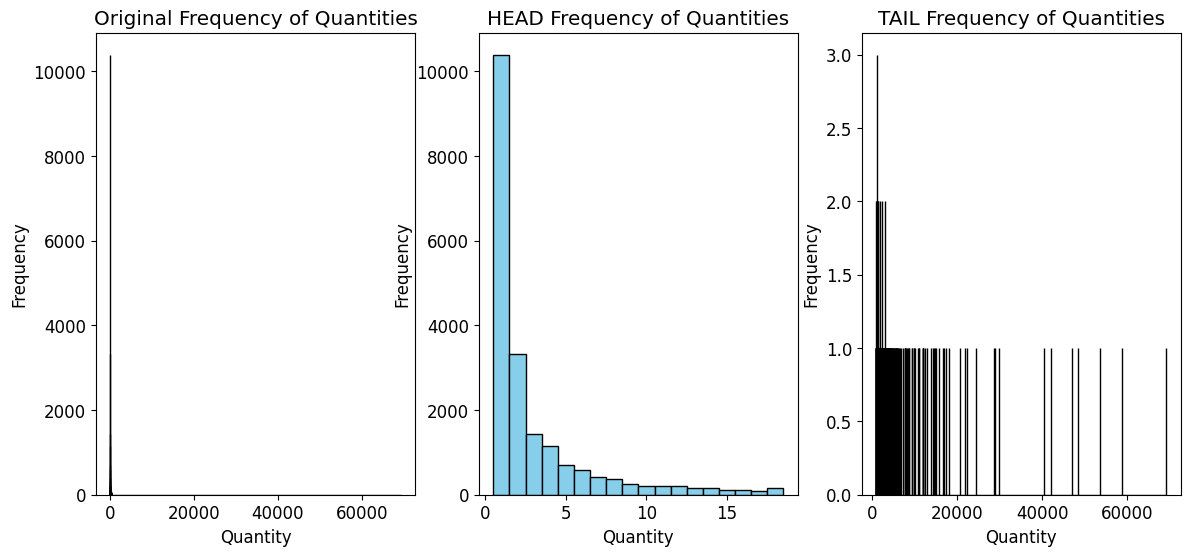

In [125]:

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Original Frequency of Quantities')

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = 20

plt.subplot(1, 3, 2)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('HEAD Frequency of Quantities')

min_range = 1000
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.subplot(1, 3, 3)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('TAIL Frequency of Quantities')

plt.show()

In [126]:
result = inventory_with_parts[inventory_with_parts['part_num'] == '3024']
result = result[['inventory_id', 'quantity', 'part_num']]
print(result)
result['quantity'].sum()

        inventory_id  quantity part_num
63                17         6     3024
85                22         1     3024
86                22         2     3024
87                22         4     3024
88                22         1     3024
...              ...       ...      ...
579728         18584         1     3024
579885         18593         2     3024
580193         18708         2     3024
580194         18708         2     3024
580195         18708         2     3024

[6309 rows x 3 columns]


42035

In [127]:
themes = pd.read_csv('./dataset/themes.csv')
themes.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [128]:
sets_with_themes = sets.merge(themes, left_on='theme_id', right_on='id', how='left')
sets_with_themes.rename(columns={'name_y': 'theme_name', 'name_x': 'name'}, inplace=True)
sets_with_themes = sets_with_themes[['set_num', 'name', 'year', 'theme_id', 'theme_name', 'parent_id', 'num_parts']]
sets_with_themes.head(5)


,set_num,name,year,theme_id,theme_name,parent_id,num_parts
0,00-1,Weetabix Castle,1970,414,Castle,411.0,471
1,0011-2,Town Mini-Figures,1978,84,Supplemental,67.0,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,Lion Knights,186.0,2
3,0012-1,Space Mini-Figures,1979,143,Supplemental,126.0,12
4,0013-1,Space Mini-Figures,1979,143,Supplemental,126.0,12


In [129]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [130]:
inventory_sets_with_sets = inventory_sets.merge(sets_with_themes, on='set_num', how='left')
inventory_sets_with_sets.head(5)

,inventory_id,set_num,quantity,name,year,theme_id,theme_name,parent_id,num_parts
0,35,75911-1,1,McLaren Mercedes Pit Stop,2015,601,Speed Champions,NaN,340
1,35,75912-1,1,Porsche 911 GT Finish Line,2015,601,Speed Champions,NaN,561
2,39,75048-1,1,The Phantom,2014,182,Star Wars Rebels,158.0,233
3,39,75053-1,1,The Ghost,2014,182,Star Wars Rebels,158.0,927
4,50,4515-1,1,Straight Rails,1991,244,9V,241.0,8


In [131]:
inventory_sets_with_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inventory_id  2846 non-null   int64  
 1   set_num       2846 non-null   object 
 2   quantity      2846 non-null   int64  
 3   name          2846 non-null   object 
 4   year          2846 non-null   int64  
 5   theme_id      2846 non-null   int64  
 6   theme_name    2846 non-null   object 
 7   parent_id     2582 non-null   float64
 8   num_parts     2846 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 200.2+ KB


In [132]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [133]:
inventories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


# Preparación del dataset

In [134]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Obtención del DataFrame principal

Encuentro una dataframe para la combinación de colores y partes. Las claves están dadas por inventory_id, que son como lotes de partes, correspondientes a sets.
Part_num es un ID alfanumeríco, y algunos incluso no tienen nombre (dan NaN), y por lo tanto también sus categorias.

In [135]:
inventory_parts = pd.read_csv('./dataset/inventory_parts.csv')
colors = pd.read_csv('./dataset/colors.csv')
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventories = pd.read_csv('./dataset/inventories.csv')
sets = pd.read_csv('./dataset/sets.csv')
part_categories = pd.read_csv('./dataset/part_categories.csv')
themes = pd.read_csv('./dataset/themes.csv')
parts = pd.read_csv('./dataset/parts.csv')

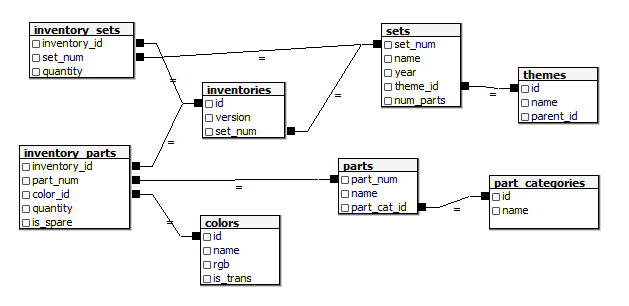

In [136]:
parts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left').drop('id',axis=1).rename(columns={'name': 'color_name'})
parts_colors = parts_colors.merge(parts, left_on='part_num', right_on='part_num', how='left').rename(columns={'name': 'part_name'})
complete_parts = parts_colors.merge(part_categories, left_on='part_cat_id',right_on='id', how='left').drop('id',axis=1).rename(columns={'name': 'category_name'})

Interesa ahora un data frame completo, incluyendo los sets. Aca incluira la información de sets, y sus temáticas, y no debería agregar más filas. Se parte de inventories, y de complete_parts.

In [137]:
complete_data = complete_parts.merge(inventories, left_on='inventory_id', right_on='id', how='left').drop('id',axis=1)
complete_data = complete_data.merge(sets, left_on='set_num', right_on='set_num', how='left').rename(columns={'name': 'set_name'})
complete_data = complete_data.merge(themes, left_on='theme_id', right_on='id', how='inner').drop('id',axis=1).rename(columns={'name': 'theme_name'})
complete_data = complete_data.merge(inventory_sets, on=['inventory_id', 'set_num'], how='left').rename(columns={'quantity_x': 'part_qty', 'quantity_y': 'set_qty'})
complete_data.head(5)

,inventory_id,part_num,color_id,part_qty,is_spare,color_name,rgb,is_trans,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,set_qty
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0,NaN
1,1,48395,7,1,f,Light Gray,9BA19D,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0,NaN
2,1,mcsport6,25,1,f,Orange,FE8A18,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0,NaN
3,1,paddle,0,1,f,Black,05131D,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0,NaN
4,7075,2431,0,2,f,Black,05131D,f,Tile 1 x 4 with Groove,19.0,Tiles,1,3537-1,Skateboard Vert Park Challenge,2003,460,91,Gravity Games,458.0,NaN


Un ejemplo de un set:

In [138]:
print(complete_data.groupby('set_name')['part_qty'].sum())
complete_data.loc[complete_data['set_name']=="'Where Are My Pants?' Guy"]

set_name
 Scenery and Dagger Trap polybag       25
 Spectre                                7
'Where Are My Pants?' Guy               6
1 x 1 Bricks                          400
1 x 1 Bricks with Letters (System)     44
                                     ... 
{Red Race Car Number 3}                39
{Roadplates and Scenery}               85
{Rock Saw Vehicle}                     22
{Town Vehicles}                       158
{Yellow Cab}                           46
Name: part_qty, Length: 9457, dtype: int64


,inventory_id,part_num,color_id,part_qty,is_spare,color_name,rgb,is_trans,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,set_qty
378871,5048,3626cpr1305,14,1,f,Yellow,F2CD37,f,"Minifig Head Male Black Eyebrows, Open Mouth S...",13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN
378872,5048,88646,0,1,f,Black,05131D,f,Tile Special 4 x 3 with 4 Studs in Centre,15.0,Tiles Special,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN
378873,5048,970c00,15,1,f,White,FFFFFF,f,Legs and Hips [Complete Assembly],13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN
378874,5048,970x001,14,1,f,Yellow,F2CD37,f,Legs and White Hips,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN
378875,5048,973pr2522c01,1,1,f,Blue,0055BF,f,Torso - Hawaiian Shirt with Orange and Red Flo...,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN
378876,5048,98371,0,1,f,Black,05131D,f,Minifig Hair Swept Back with Forelock,13.0,Minifigs,1,71004-13,'Where Are My Pants?' Guy,2014,549,6,The LEGO Movie Series,535.0,NaN


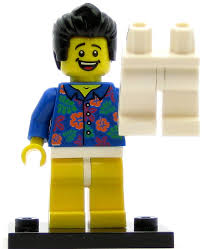

# Ajustes iniciales

In [139]:
data = complete_data.copy(deep=True)
print(f"Total amount of rows is {data['inventory_id'].count()}")
print(f"Total amount of columns is {len(data.columns)}")
numerical_features = data.select_dtypes([np.number]).columns.to_list()
print(f"Total number of numeric columns is {len(numerical_features)}")
categorical_features = data.select_dtypes([object]).columns.to_list()
print(f"Total number of categorical columns is {len(categorical_features)}")

Total amount of rows is 580251
Total amount of columns is 20
Total number of numeric columns is 10
Total number of categorical columns is 10


## Imputación de valores faltantes

In [140]:
data.isnull().any()

inventory_id     False
part_num         False
color_id         False
part_qty         False
is_spare         False
color_name       False
rgb              False
is_trans         False
part_name         True
part_cat_id       True
category_name     True
version          False
set_num          False
set_name         False
year             False
theme_id         False
num_parts        False
theme_name       False
parent_id         True
set_qty           True
dtype: bool

### Analisis Inicial de Valores Faltantes
* **Parent Id:** Parent_id en NaN indica que no tiene padre. Se prefiere que eso sea 0 en vez de un NaN.
* **Part Name:** Los part_name nulls, parecen ser part_number que no estan en la tabla 'parts'. El nombre no es importante, así que se copia el part_num cuando es NaN.
* **Category:** Para los category/category_id faltantes, hay que hacer alguna forma de imputación por set.
* **Set Qty:** Se propone poner en 0 el valor de cantidad en caso de no existir el valor real.

In [141]:
data['parent_id'] = data['parent_id'].apply(lambda x: x if not np.isnan(x) else 0)
data['set_qty'] = data['set_qty'].apply(lambda x: x if not np.isnan(x) else 0)
data[data['part_name'].isna()].sort_values('part_num')

,inventory_id,part_num,color_id,part_qty,is_spare,color_name,rgb,is_trans,part_name,part_cat_id,category_name,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,set_qty
284929,5850,19807,297,1,f,Pearl Gold,AA7F2E,f,NaN,NaN,NaN,1,70591-1,Kryptarium Prison Breakout,2016,435,202,Ninjago,0.0,0
1095,2467,2476,15,3,f,White,FFFFFF,f,NaN,NaN,NaN,1,40114-1,LEGO Friends Buildable Jewelry Box,2014,494,201,Friends,0.0,0
454763,11202,2476,71,12,f,Light Bluish Gray,A0A5A9,f,NaN,NaN,NaN,1,70165-1,Ultra Agents Mission HQ,2014,303,1056,Ultra Agents,302.0,0
177116,2152,2476,71,3,f,Light Bluish Gray,A0A5A9,f,NaN,NaN,NaN,1,10191-1,Star Justice,2008,397,884,Factory,0.0,0
226357,7153,2476,71,4,f,Light Bluish Gray,A0A5A9,f,NaN,NaN,NaN,1,70132-1,Scorm's Scorpion Stinger,2014,571,433,Legends of Chima,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417952,6738,rb00164,0,1,f,Black,05131D,f,NaN,NaN,NaN,1,8854-1,Power Crane,1989,7,516,Construction,5.0,0
410842,13982,rb00164,0,1,f,Black,05131D,f,NaN,NaN,NaN,1,7033-1,Armored Car Action,2003,111,179,Police,105.0,0
218503,16351,rb00164,0,1,f,Black,05131D,f,NaN,NaN,NaN,1,9454-1,Function Set,1992,534,350,Universal Building Set,507.0,0
372875,3964,rb00164,0,1,f,Black,05131D,f,NaN,NaN,NaN,1,3800-1,Ultimate Builders Set,2001,260,322,RCX,258.0,0


Para las categorias de partes, se decide imputar por estadísticos, particularmente la moda. Se puede mejorar su precisión buscando la moda por temática o set, eligiendo la primera porque hay más opciones de categorías (ya que las temáticas son supersets de los sets) posibles dentra de cada una, lo que no limita las categorias a las pocas que pueda tener no nulas cada set.

In [142]:
data.loc[data['part_name'].isna(),'part_name'] = data['part_num']
print(f"Hay un total de {data[data['category_name'].isna()].sort_values('part_num').shape[0]} filas con categorias NaN")
print(f"Hay {data[data['category_name'].isna()].sort_values('set_name').groupby(['theme_name']).count().shape[0]} tematicas distintas con valores NaN")
print(f"Hay {data[data['category_name'].isna()].sort_values('set_name').groupby(['set_name']).count().shape[0]} sets distintos con valores NaN")

#Se obtiene un diccionario con el valor mas frecuente de category_id, indexado por theme_id. Es decir, se obtiene el id de categoria más frecuente por cada tematica.
modeCategoryIdByThemeId = data.groupby(['theme_id'])['part_cat_id'].agg(lambda series: series.mode()[0]).to_dict()
#Un diccionario de sets con los nombres para cada id de categoria.
categoryNameById = data.groupby(['part_cat_id'])['category_name'].agg(lambda series: series.unique()[0]).to_dict()

#Se obtiene un dataframe temporal con theme_id mapeado a su moda, y se usa para completar los NaN de part_cat_id.
data['part_cat_id'] = data['part_cat_id'].fillna(data['theme_id'].map(modeCategoryIdByThemeId))
#Lo mismo para category_name.
data['category_name'] = data['category_name'].fillna(data['part_cat_id'].map(categoryNameById))
data.isnull().any()

Hay un total de 182 filas con categorias NaN
Hay 77 tematicas distintas con valores NaN
Hay 159 sets distintos con valores NaN


inventory_id     False
part_num         False
color_id         False
part_qty         False
is_spare         False
color_name       False
rgb              False
is_trans         False
part_name        False
part_cat_id      False
category_name    False
version          False
set_num          False
set_name         False
year             False
theme_id         False
num_parts        False
theme_name       False
parent_id        False
set_qty          False
dtype: bool

# Caracterización de features
## Numericas
Las features numericas pueden ser transformadas para que se asemejen a distrubiciones normales. Se ve si es necesario.

In [143]:
import scipy.stats as stats
import seaborn as sns

def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box')

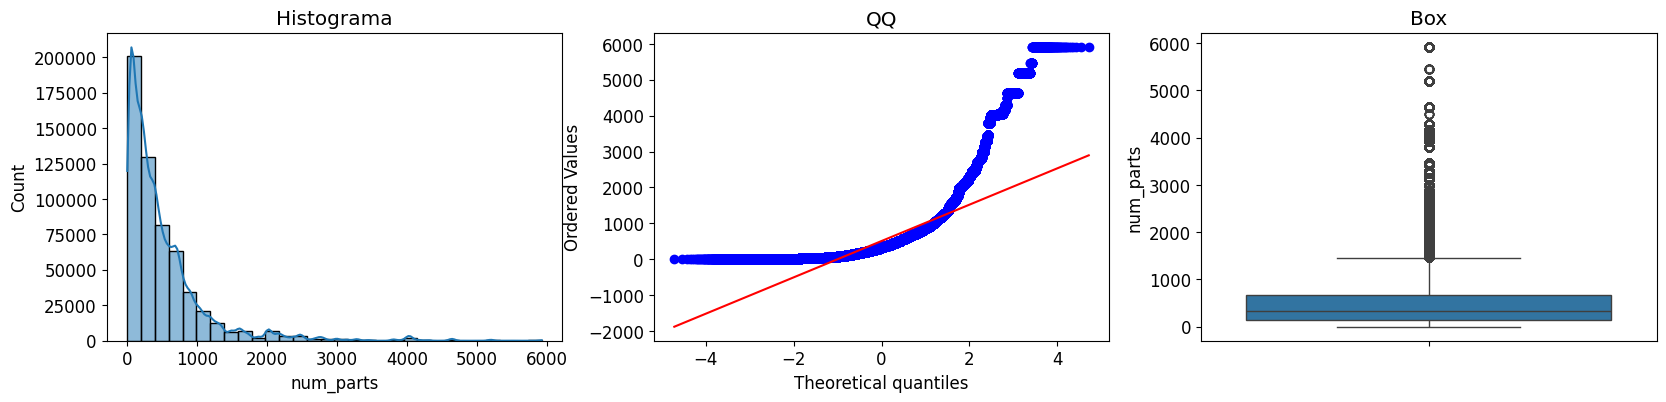

In [144]:
outlier_diagnostic_plots(data,'num_parts')

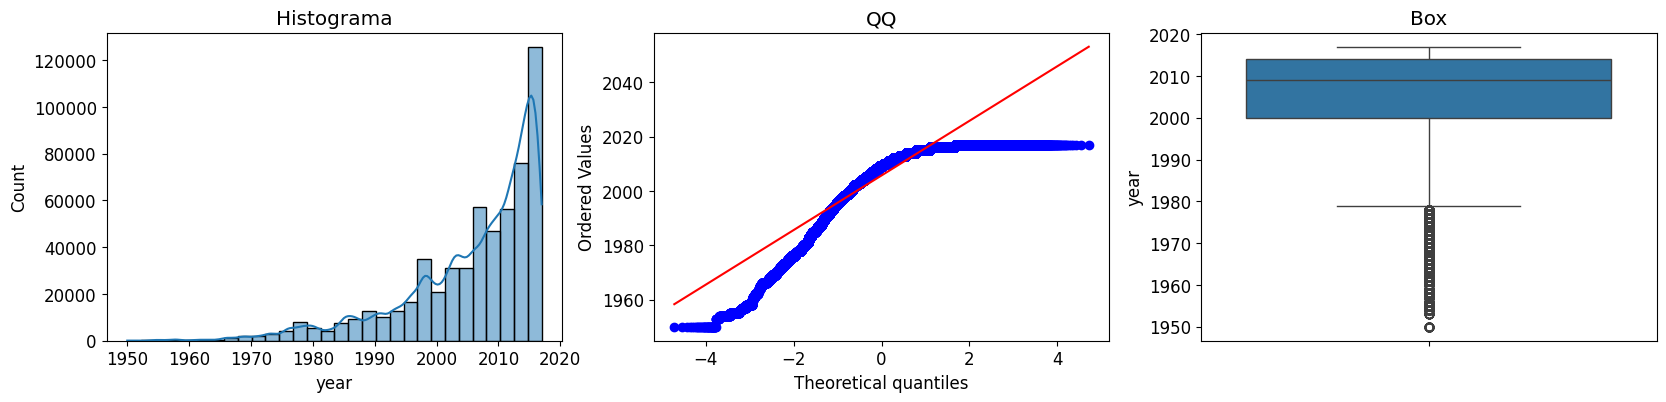

In [145]:
outlier_diagnostic_plots(data,'year')

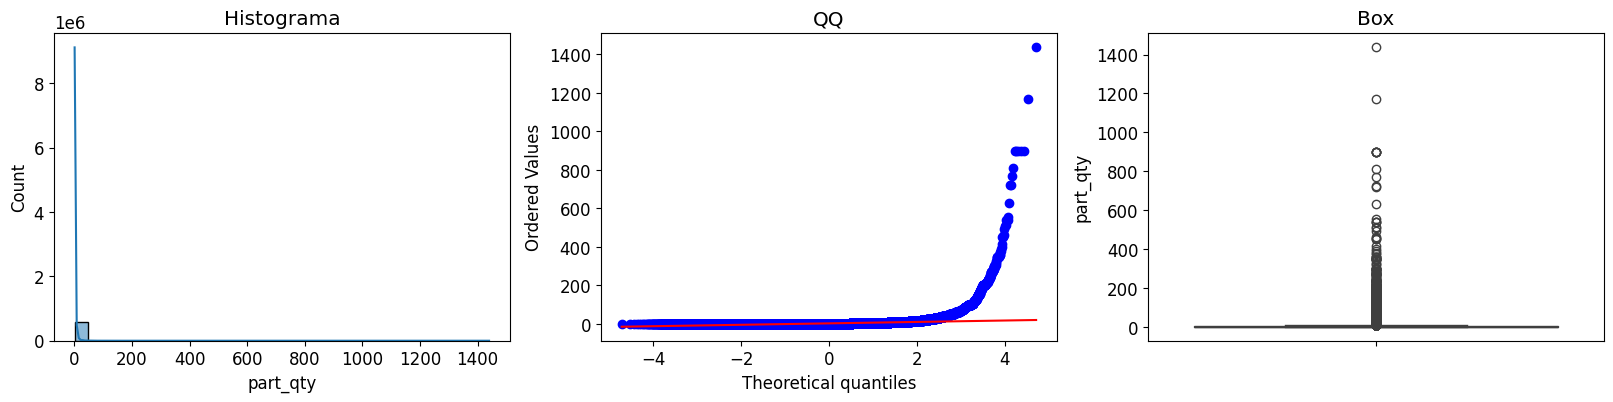

In [146]:
outlier_diagnostic_plots(data,'part_qty')

## Categóricas
Se ve la distribución del feature objetivo, theme_id


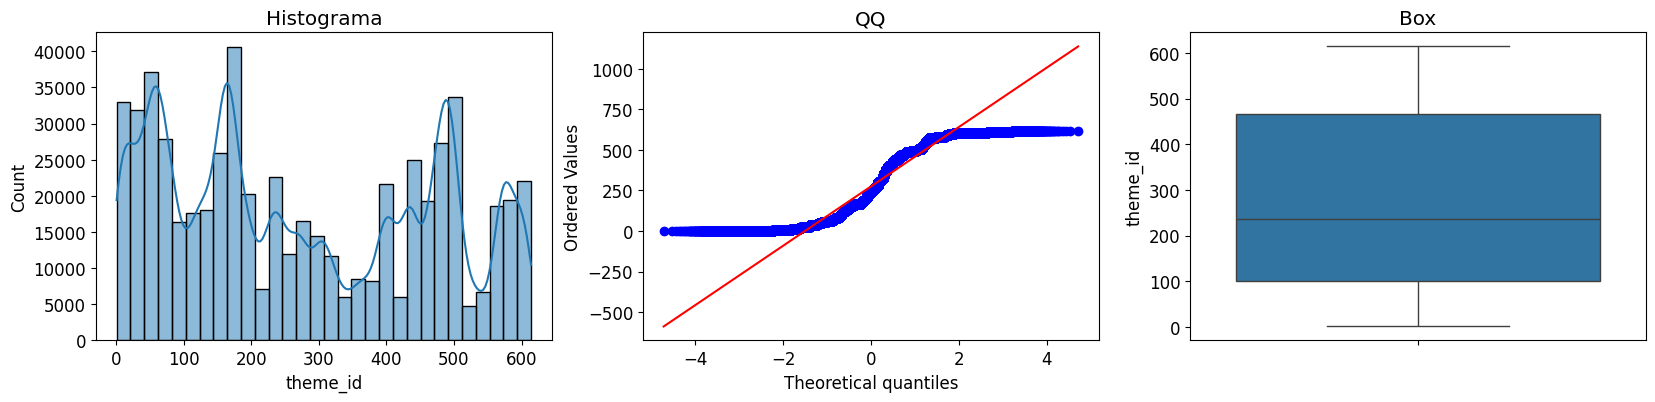

In [147]:
outlier_diagnostic_plots(data,'theme_id')

In [148]:
#outlier_diagnostic_plots(data,'set_num')

In [149]:
#outlier_diagnostic_plots(data,'part_num')

# Analisis de Rareza
### Comentarios Iniciales
- Pregunta: A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más raras?
1. El primer paso para resolver esta pregunta es definir cuales van a ser los criterios para definir la rareza de una pieza.
2. Una vez encontrados esos criterios, hay que aplicarlos para ver año a año cuales fueron las mas raras
3. Por ultimo, se debe identificar el set al que pertenece esa pieza

### Criterio de Rareza

1. **Cantidad de Apariciones en el Inventario**

    El primer criterio a utilizar es la "cantidad" de apariciones de una pieza determinada en el inventario de cada año.
    Se comienza contando, para cada año, cuantas veces aparece en el inventario cada pieza.
    Luego se toman, para cada año, el conjunto de piezas que ha aparecido menos veces.

In [150]:
partNumOcurrenceYear = data.groupby(['year'])[['part_num']].value_counts()
partNumOcurrenceYear = partNumOcurrenceYear.reset_index(name='count')
result = partNumOcurrenceYear.groupby(['year', 'count'])['part_num'].nunique().reset_index()

min_counts_ocurrence = result.groupby('year')['count'].min().reset_index()
result = pd.merge(result, min_counts_ocurrence, on=['year', 'count'])
result = result.rename(columns={'part_num': 'part_num_count', 'count':'inventory_count'})

print(f"Para cada año hay multiples 'part_num' con mismo 'count' de 'inventories'")
print(f"Ej.: en {result.iloc[0]['year']}, hay {result.iloc[0]['part_num_count']} 'part_num' distintos que aparecen {result.iloc[0]['inventory_count']} veces en el inventario")
print(f"Promedio de cantidad de apariciones de los 'part_num' con menores apariciones en inventario para un dado año: {result['part_num_count'].mean()} ")

result.head(10)

Para cada año hay multiples 'part_num' con mismo 'count' de 'inventories'
Ej.: en 1950, hay 4 'part_num' distintos que aparecen 5 veces en el inventario
Promedio de cantidad de apariciones de los 'part_num' con menores apariciones en inventario para un dado año: 448.0 


,year,inventory_count,part_num_count
0,1950,5,4
1,1953,1,4
2,1954,1,10
3,1955,1,44
4,1956,1,22
5,1957,1,38
6,1958,1,83
7,1959,1,8
8,1960,1,26
9,1961,1,55


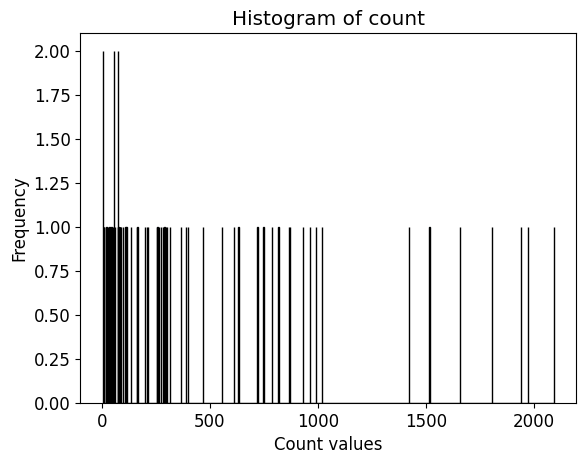

In [151]:
plt.hist(result['part_num_count'], bins=range(min(result['part_num_count']), max(result['part_num_count']) + 1), edgecolor='black')
plt.title('Histogram of count')
plt.xlabel('Count values')
plt.ylabel('Frequency')

plt.show()

### BORRAR EL BLOQUECITO DE ABAJO?

In [152]:
# TODO: Modificar codigo para traer el set_num de todos los part_num que compartan el mismo 'count'
rarestPartYears  = partNumOcurrenceYear.loc[partNumOcurrenceYear.groupby(['year'])['count'].idxmin()].reset_index(drop=True)

# Filtrar filas originales por los números de parte menos comunes
rarestPartYearsSets = data[data.set_index(['year', 'part_num']).index.isin(rarestPartYears.set_index(['year', 'part_num']).index)]
rarestPartYearsSets = rarestPartYearsSets[['year', 'part_num','set_num']].sort_values(by=['year']).reset_index(drop=True).groupby(['year', 'part_num', 'set_num']).size().reset_index(name='row_count')
rarestPartYearsSets

,year,part_num,set_num,row_count
0,1950,bdoor01,700.B.4-1,5
1,1953,bdoor01,700.B-1,1
2,1954,29bc01,700GP6-1,1
3,1955,3009apb45a,1224-2,1
4,1956,713a,1228-2,1
...,...,...,...,...
61,2013,11374pb01,10515-1,1
62,2014,98393b,41038-1,1
63,2015,3005pr0012,71016-1,1
64,2016,15499,71011-16,1


   1. **Conclusion:**

      - Se encontraron los grupos de piezas que menos aparecen en el inventario por año.
      - Estos grupos son muy numerosos (hay muchas piezas que aparecen la misma cantidad de veces en el inventario por cada año).
      - Es necesario implementar otro criterio para definir la rareza

2. **Rareza segun 'quantity' de la pieza**
   - Se considera que la rareza viene definida no por la cantidad de apariciones en 'inventory', sino por la cantidad registrada de piezas en el inventario.

In [153]:
partNumQuantityYear = data.groupby(['year','part_num'])[['part_qty']].sum()
partNumQuantityYear = partNumQuantityYear.reset_index()
partNumQuantityYearMin = partNumQuantityYear.groupby(['year', 'part_qty'])['part_num'].nunique().reset_index()

min_counts_quantity = partNumQuantityYearMin.groupby('year')['part_qty'].min().reset_index()
partNumQuantityYearMin = pd.merge(partNumQuantityYearMin, min_counts_quantity, on=['year', 'part_qty'])

partNumQuantityYearMin

,year,part_qty,part_num
0,1950,7,4
1,1953,2,1
2,1954,1,9
3,1955,1,42
4,1956,1,15
...,...,...,...
61,2013,1,1490
62,2014,1,1448
63,2015,1,1669
64,2016,1,1829


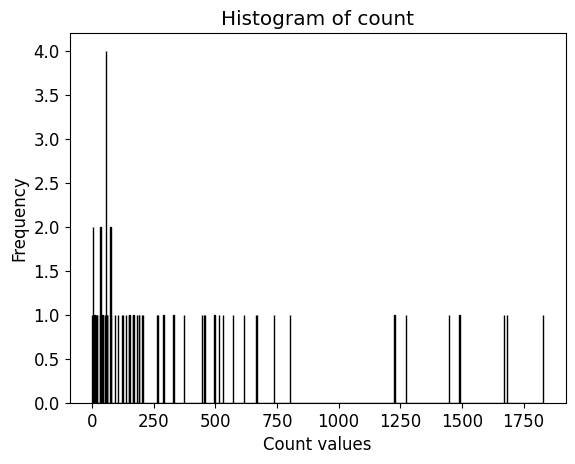

In [154]:
plt.hist(partNumQuantityYearMin['part_num'], bins=range(min(partNumQuantityYearMin['part_num']), max(partNumQuantityYearMin['part_num']) + 1), edgecolor='black')
plt.title('Histogram of count')
plt.xlabel('Count values')
plt.ylabel('Frequency')

plt.show()

   2. **Conclusion:**

      - Se encontraron los grupos de piezas que menor cantidad presentan en el inventario por año.
      - Al igual que en el analisis anterior, estos grupos son muy numerosos (hay muchas piezas que tienen la misma 'quantity' en el inventario por cada año).
      - Es necesario implementar otro criterio para definir la rareza

3. **Rareza segun Color**
* Se plantea que la rareza se puede definir segun el color de la pieza
* Para el calculo primero se cuenta, para cada año, cuantas veces aparece en el inventario cada "color_id"
* Se toman los color_id que aparecen con menos frecuencia en cada año
* Se suma el total de veces que aparecen los N colores mas extraños por año para tener una nocion general de que tan bueno es el "color_id" como parametro de rareza
**Conclusion:** Se puede ver que, en la mayoria de los años existe un numero muy pequeño de invetarios que comparten el "color_id" mas extraño de ese año. Por ende, puede definirse que el color es un buen criterio para definir la rareza de la pieza.

In [155]:
partNumColorYear = data.groupby(['year', 'color_id'])[['color_id']].value_counts().reset_index()

min_color_ocurrence = partNumColorYear.groupby(['year'])[['count', 'color_id']].apply(lambda x: x[x['count'] == x['count'].min()][['color_id', 'count']]).reset_index().drop(['level_1'], axis=1)
min_color_ocurrence = min_color_ocurrence.groupby(['year'])[['count']].sum()

print("Cantidad de ocurrencias por año de los N colores menos frecuentes")
min_color_ocurrence

Cantidad de ocurrencias por año de los N colores menos frecuentes


,count
year,
1950,10
1953,1
1954,2
1955,1
1956,1
...,...
2013,5
2014,4
2015,3


* En base a la conclusión anterior, ahora nos disponemos a buscar todos los items del inventario que tengan el/los colores mas extraños de cada año

In [156]:
partNumColorYear.head(25)
a = data[['year', 'part_num', 'set_num', 'color_id', 'part_qty']]
a.reset_index()
a = a.groupby(['year'])[['color_id']].value_counts().reset_index()
a.head(6)

,year,color_id,count
0,1950,4,8
1,1950,14,8
2,1950,15,8
3,1950,1,6
4,1950,2,6
5,1950,10,2


* La variable "a" es el contador de cada "color_id" por año
* A continuacion se calcula cual es el "color_id" con menores apariciones (minimo count)

In [157]:
min_counts = a.groupby('year')['count'].min()
min_counts.head(5)

year
1950    2
1953    1
1954    1
1955    1
1956    1
Name: count, dtype: int64

* "min_counts" es la tabla que indica, para cada año, cuantas veces aparecen los colores menos frecuentes de ese año
* A continuacion se calcula "result_df" que contiene los "color_id" para cada año cuyo "count" coincide con "min_counts"

In [158]:
result_df = a[a.apply(lambda row: row['count'] == min_counts[row['year']], axis=1)]
result_df.reset_index()
result_df.head(10)

,year,color_id,count
5,1950,10,2
6,1950,17,2
7,1950,47,2
8,1950,73,2
9,1950,462,2
14,1953,1,1
20,1954,47,1
21,1954,7,1
28,1955,9999,1
33,1956,9999,1


* Sabiendo los "color_id" menos frecuentes por año, se buscan todas las filas donde aparezca la combinacion "año" + "color_id"

In [159]:
c = data[['year', 'part_num', 'set_num', 'color_id', 'part_qty']]
c.reset_index()

d = pd.merge(c, result_df, on=['year', 'color_id']).drop(columns=['count'])
d = d.sort_values(by='year')
d.head(15)

,year,part_num,set_num,color_id,part_qty
19,1950,bslot02,700.1.2-1,462,1
24,1950,bslot04,700.A-1,10,3
23,1950,bslot04,700.1.1-1,10,1
22,1950,bslot04,700.1.1-1,47,1
21,1950,bslot02,700.1.2-1,47,1
20,1950,bslot04,700.1.1-1,462,1
18,1950,bslot04,700.1.1-1,73,1
17,1950,bslot02,700.1.2-1,73,1
16,1950,bslot04,700.1.1-1,17,1
15,1950,bslot02,700.1.2-1,17,1


* Por ultimo, se agrupan los datos calculados segun año y "set_num" para lograr el listado de sets por año con las piezas mas raras.

In [160]:
e = d.groupby(['year', 'set_num'])[['set_num']].value_counts().reset_index()
e.head(10)

,year,set_num,count
0,1950,700.1.1-1,5
1,1950,700.1.2-1,4
2,1950,700.A-1,1
3,1953,700.3.4-1,1
4,1954,700GP5-1,1
5,1954,700GP6-1,1
6,1955,1200-1,1
7,1956,1200-2,1
8,1957,1223-3,1
9,1957,1260-2,1


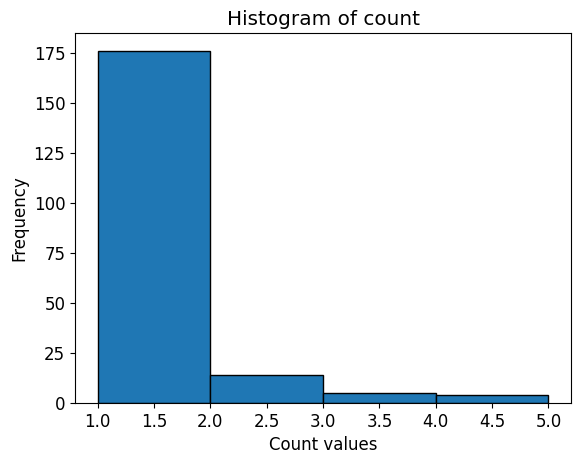

In [161]:
plt.hist(e['count'], bins=range(min(e['count']), max(e['count']) + 1), edgecolor='black')
plt.title('Histogram of count')
plt.xlabel('Count values')
plt.ylabel('Frequency')

plt.show()


# Preprocesamiento de features

## RGB a enteros
El valor de RGB sirve más como 3 columnas de colores base (red, green y blue), que además quedan como enteross.

In [162]:
def hex_to_rgb(value):
    """Return (red, green, blue) for the color given as #rrggbb."""
    value = value.lstrip('#')
    lv = len(value)
    return np.array(list(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)))

colors = pd.DataFrame(data['rgb'].apply(lambda x: hex_to_rgb(x)).to_list(), columns=['red','green', 'blue'])
data[['red','green', 'blue']] = colors
data = data.drop('rgb',axis=1)

## Binarización
Se convierte is_trans y is_spare a 0 o 1.

In [163]:
data['is_spare'] = data['is_spare'].apply(lambda x: 1 if ((x == 't' or x == 1)) else 0)
data['is_trans'] = data['is_trans'].apply(lambda x: 1 if ((x == 't' or x == 1)) else 0)

## Transformaciones y encoders

In [164]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OrdinalEncoder
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce

def preprocessPipline(data, target, numerical, categorical, other, drop):
    categorical_features_redux = categorical #['part_num', 'set_num']
    other_features = other #['red', 'green', 'blue','is_trans','is_spare']
    numerical_features = numerical #['part_qty','year','num_parts']
    dropped_features = drop #['color_name','category_name','theme_name','set_name', 'part_name','inventory_id','color_id']
    data_prep = data.drop(dropped_features,axis=1).copy(deep=True)

    CategoricalTransformer = Pipeline(steps=[
        ('Binary',ce.BinaryEncoder(drop_invariant=True))
    ])
    #Evito error de overflow
    data_prep[numerical_features] = data_prep[numerical_features].astype(float)

    NumericalTransformer = Pipeline(steps=[
        ('Transformer',PowerTransformer(method='box-cox'))
    ])

    NoTransformer = Pipeline(steps=[
        ('none',None)
    ])

    tranformers = ColumnTransformer(transformers=[
        ('cat', CategoricalTransformer, categorical_features_redux),
        ('num', NumericalTransformer, numerical_features),
        ('notransform', NoTransformer, other_features),
        ('target', OrdinalEncoder(), target)
    ], verbose_feature_names_out = False)

    tranformers.set_output(transform='pandas')
    data_prep = tranformers.fit_transform(data_prep)
    return data_prep

data_prep = preprocessPipline(data,
                target= ['theme_id'],
                numerical = ['part_qty','year','num_parts'],
                categorical = ['part_num', 'set_num'],
                other= ['red', 'green', 'blue','is_trans','is_spare'],
                drop = ['color_name','category_name','theme_name','set_name', 'part_name','inventory_id','color_id'])

C:\Users\Javier\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Javier\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [165]:
data_prep

,part_num_0,part_num_1,part_num_2,part_num_3,part_num_4,part_num_5,part_num_6,part_num_7,part_num_8,part_num_9,...,set_num_13,part_qty,year,num_parts,red,green,blue,is_trans,is_spare,theme_id
0,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,108,110,104,0,0,422.0
1,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,155,161,157,0,0,422.0
2,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,254,138,24,0,0,422.0
3,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,5,19,29,0,0,422.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.221225,-0.401766,-0.931550,5,19,29,0,0,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580246,1,0,1,1,0,1,0,0,1,0,...,1,-1.071517,1.224935,0.170162,169,85,0,0,0,555.0
580247,0,0,0,0,0,0,0,1,0,1,...,1,1.029794,1.224935,0.170162,245,205,47,1,0,555.0
580248,0,0,0,0,0,0,0,1,0,1,...,1,0.221225,1.224935,0.170162,252,252,252,1,1,555.0
580249,0,0,0,0,0,0,0,1,0,1,...,1,1.219121,1.224935,0.170162,252,252,252,1,0,555.0


# Desbalance de clases

Es primero interesante plantearse si el desbalance es realmente un problema: vease https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he.

set_num  part_num
00-1     3004        4
         3001a       3
         3062a       3
         3010        3
         3009        3
                    ..
vwkit-1  3030        1
         3004        1
         3003        1
         132a        1
         7049b       1
Name: count, Length: 440659, dtype: int64

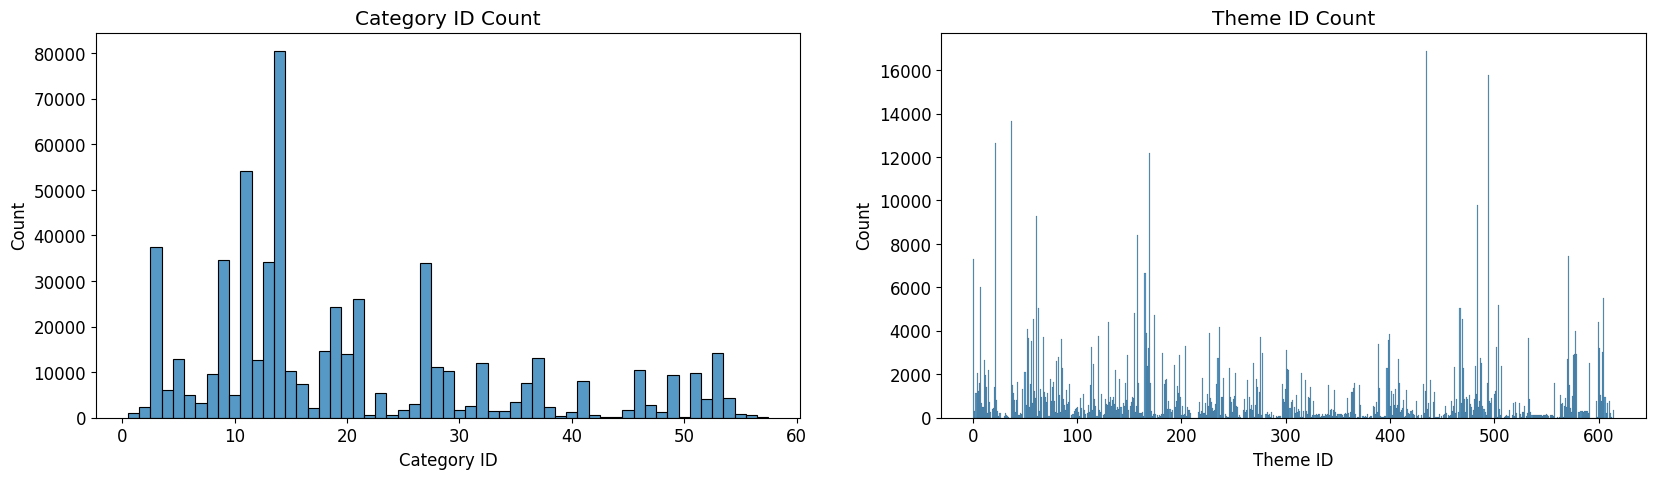

In [166]:
import seaborn as sns

data[['part_cat_id']].value_counts().sort_values(ascending=True)
fig, axs = plt.subplots(ncols=2,figsize=(20, 5))
sns.histplot(data = data['part_cat_id'], discrete=True, ax=axs[0])
axs[0].set_title('Category ID Count')
axs[0].set_xlabel('Category ID')
axs[0].set_ylabel('Count')
sns.histplot(data = data['theme_id'], discrete=True, ax=axs[1])
axs[1].set_title('Theme ID Count')
axs[1].set_xlabel('Theme ID')
axs[1].set_ylabel('Count')
data.groupby('set_num')[['part_num']].value_counts()

Los ID de tematicas son parte los objetivos, asi que se busca el desbalance de esta caracteristica.

In [167]:
theme_counts = data.theme_id.value_counts()
print(f'La tematica más frecuente, {theme_counts.index[0]}, tiene {theme_counts.iat[0]} ocurrencias')
print(f'El set menos frecuente, {theme_counts.index[-1]}, tiene {theme_counts.iat[-1]} ocurrencias')
print(f'El peor desbalance es de {theme_counts.iloc[0]/theme_counts.iloc[-1]}')
data.theme_id.unique().shape

La tematica más frecuente, 435, tiene 16876 ocurrencias
El set menos frecuente, 368, tiene 1 ocurrencias
El peor desbalance es de 16876.0


(556,)

### Balanceado de clases en theme_id

Se aplica una estrategia combinada de under y oversampling con un pipeline. Como se vio arriba, existen temáticas con 1 sola muestra. Eso imposibilita el uso de estrategias SMOTE (en algunos casos la cantidad de vecinos cercanos es 1), así que se usan random over y undersamplers, dejando un máximo por categoría de 100, lo que es arbitrario.

Esto es visto por categorías en bruto. Para mejorar el rendimiento, se podría reemplazar theme_id por su parent_id mientras no sea 0.

In [168]:
data_balanced = data_prep.copy(deep=True)
max_samples = 100
samples = {}
for x in data_balanced[target].value_counts()[data_balanced[target].value_counts()>=max_samples].index.tolist():
    samples[x[0]] = max_samples

#Originalmente la idea era usar SMOTEN (un SMOTE por knn para categoricos, al que primero convierte las columnas por OrdinalEncoder, que es lo mismo que lo se quiso hacer arriba con LabelEncoder)
#Pero el KNN fallaba para las categorias con un solo sample.
balancer = imbPipeline(steps=[
    ('undersampler', RandomUnderSampler(sampling_strategy=samples)),
    ('oversampler', RandomOverSampler(sampling_strategy='auto',random_state=42))
])

data_balanced,resampled_target = balancer.fit_resample(data_balanced.drop(target,axis=1),y=data_balanced[target])

In [169]:
data_balanced_final = data_balanced.join(resampled_target)
data_balanced_final[target].value_counts()

theme_id
0.0         100
373.0       100
367.0       100
368.0       100
369.0       100
           ... 
179.0       100
178.0       100
177.0       100
176.0       100
555.0       100
Name: count, Length: 556, dtype: int64

In [170]:
data_balanced_final

,part_num_0,part_num_1,part_num_2,part_num_3,part_num_4,part_num_5,part_num_6,part_num_7,part_num_8,part_num_9,...,set_num_13,part_qty,year,num_parts,red,green,blue,is_trans,is_spare,theme_id
0,0,0,0,1,1,1,0,0,0,1,...,0,1.600259,0.959857,2.271605,201,26,9,0,0,0.0
1,0,0,0,0,0,1,0,1,0,1,...,1,1.738266,1.224935,0.149110,160,165,169,0,0,0.0
2,0,0,0,0,0,0,1,1,0,1,...,0,2.241129,0.706485,1.597740,0,85,191,0,0,0.0
3,0,0,0,0,0,0,0,1,0,1,...,1,1.029794,1.090900,2.231739,160,165,169,0,0,0.0
4,0,0,0,1,0,0,1,0,1,0,...,1,1.353931,0.706485,0.766445,5,19,29,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55595,1,0,1,1,0,1,0,0,1,0,...,0,-1.071517,1.224935,-0.769022,10,52,99,0,0,554.0
55596,0,0,0,0,0,0,0,0,0,0,...,0,-1.071517,1.224935,-0.769022,255,255,255,0,0,554.0
55597,0,0,0,0,0,0,0,0,1,0,...,0,-1.071517,1.224935,-0.769022,228,205,158,0,0,554.0
55598,0,0,0,0,0,0,0,0,1,0,...,0,1.219121,1.224935,-0.769022,255,255,255,0,0,554.0


Sin embargo, esto produce muchos resultados aleatorios, además de reducir la cantidad de información real. Se intenta, entonces, reducir la cantidad de clases objetivo.

## Reducción de clases

In [171]:
data['theme_id'].unique().shape

(556,)

Se reducen primero la cantidad de clases objetivo reemplazando su theme_id por su parent_id (si no es 0):

In [172]:
data.loc[data['parent_id'] !=0, 'theme_id'] = data['parent_id']
data['theme_id'].unique().shape

(136,)

La tematica más frecuente, 158, tiene 47016 ocurrencias
El set menos frecuente, 454, tiene 9 ocurrencias
El peor desbalance es de 5224.0


<Axes: xlabel='theme_id', ylabel='Count'>

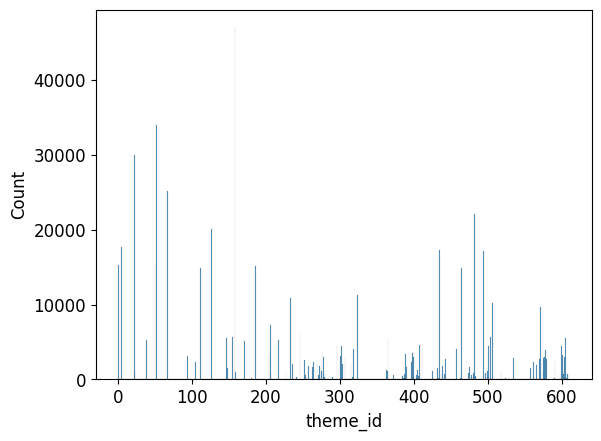

In [173]:
theme_counts = data.theme_id.value_counts()
print(f'La tematica más frecuente, {theme_counts.index[0]}, tiene {theme_counts.iat[0]} ocurrencias')
print(f'El set menos frecuente, {theme_counts.index[-1]}, tiene {theme_counts.iat[-1]} ocurrencias')
print(f'El peor desbalance es de {theme_counts.iloc[0]/theme_counts.iloc[-1]}')
sns.histplot(data = data['theme_id'], discrete=True)

### Rebalanceado de clases 

In [174]:
data['theme_id'].unique().shape

(136,)

In [175]:
from imblearn.over_sampling import BorderlineSMOTE

target=['theme_id']

data_prep = preprocessPipline(data,
                target= target,
                numerical = ['part_qty','year','num_parts'],
                categorical = ['part_num', 'set_num'],
                other= ['red', 'green', 'blue','is_trans','is_spare'],
                drop = ['color_name','category_name','theme_name','set_name', 'part_name','inventory_id','color_id'])

balancer = imbPipeline(steps=[
    ('oversampler', BorderlineSMOTE(sampling_strategy='auto',random_state=42, k_neighbors = 2))
])

data_balanced,resampled_target = balancer.fit_resample(data_prep.drop(target,axis=1),y=data_prep[target])

C:\Users\Javier\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Javier\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [176]:
data_balanced_final = data_balanced.join(resampled_target)
data_balanced_final[target].value_counts()
data_balanced_final

,part_num_0,part_num_1,part_num_2,part_num_3,part_num_4,part_num_5,part_num_6,part_num_7,part_num_8,part_num_9,...,set_num_13,part_qty,year,num_parts,red,green,blue,is_trans,is_spare,theme_id
0,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,108,110,104,0,0,88.0
1,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,155,161,157,0,0,88.0
2,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,254,138,24,0,0,88.0
3,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,-0.301904,-2.562677,5,19,29,0,0,88.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.221225,-0.401766,-0.931550,5,19,29,0,0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394171,0,0,0,0,0,0,0,0,0,0,...,1,-1.065031,1.224935,-0.571222,255,255,255,0,0,135.0
6394172,0,0,0,0,0,0,0,1,1,0,...,0,-1.071517,1.224935,-0.750725,160,165,169,0,1,135.0
6394173,0,0,0,0,0,0,0,0,0,0,...,1,-1.071517,1.224935,-0.806826,10,52,99,0,0,135.0
6394174,0,0,0,0,0,0,0,1,0,0,...,0,-1.071517,1.224935,-0.771201,255,255,255,0,0,135.0


La tematica más frecuente, 88.0, tiene 47016 ocurrencias
El set menos frecuente, 135.0, tiene 47016 ocurrencias
El peor desbalance es de 1.0


<Axes: xlabel='theme_id', ylabel='Count'>

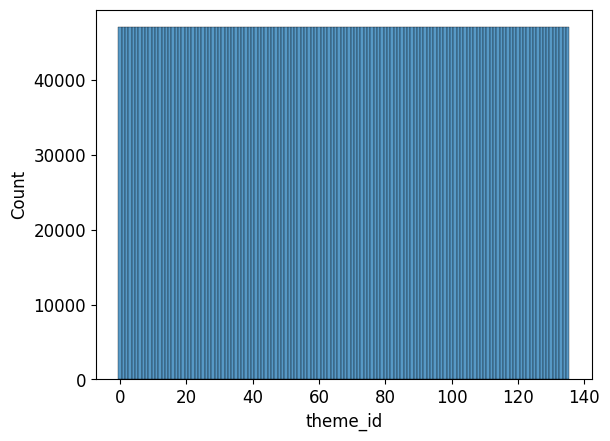

In [177]:
theme_counts = data_balanced_final['theme_id'].value_counts()
print(f'La tematica más frecuente, {theme_counts.index[0]}, tiene {theme_counts.iat[0]} ocurrencias')
print(f'El set menos frecuente, {theme_counts.index[-1]}, tiene {theme_counts.iat[-1]} ocurrencias')
print(f'El peor desbalance es de {theme_counts.iloc[0]/theme_counts.iloc[-1]}')

data_balanced_final['theme_id'].value_counts()
sns.histplot(data = data_balanced_final['theme_id'], discrete=True)